In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wanshouxigong.csv to Wanshouxigong.csv


In [3]:
data=read_csv("Wanshouxigong.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [4]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Wanshouxigong.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [5]:
dataset.drop("No", axis=1, inplace=True)

In [6]:
dataset=dataset.fillna(method="pad")

In [7]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [8]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,85.356562,112.729215,17.369966,55.643387,1376.914243,55.978065,13.782290,1011.516363,2.705590,0.064285,1.745317
std,86.627607,98.700415,24.270784,36.092564,1238.856861,57.165967,11.386498,10.571637,13.705357,0.796766,1.206447
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,22.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,117.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [9]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

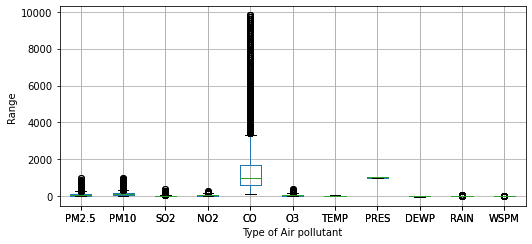

In [10]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

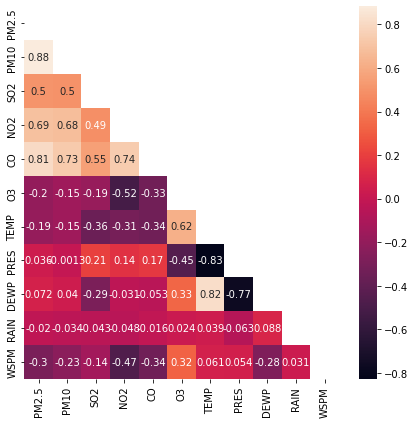

In [11]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
 
# displaying heatmap
plt.show()

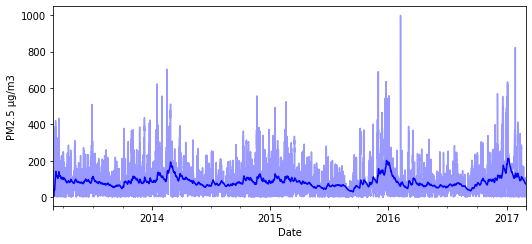

In [12]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./Wanshouxigong.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([14., 14., 14., ...,  7.,  6.,  5.], dtype=float32)

In [ ]:
values

array([[ 9. ,  9. ,  6. , ...,  0. , 14. ,  2. ],
       [11. , 11. ,  7. , ...,  0. , 14. ,  4.4],
       [ 8. ,  8. ,  7. , ...,  0. , 14. ,  4.7],
       ...,
       [14. , 28. ,  4. , ...,  0. ,  7. ,  1.1],
       [12. , 23. ,  4. , ...,  0. ,  6. ,  1.2],
       [13. , 19. ,  4. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(GRU(units = 50)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath="/save.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
tb = TensorBoard('logs')
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,callbacks=[mcp,rlr],validation_data=(X_test, Y_test), verbose=1, shuffle=False)


Epoch 1/100
411/411 [==============================] - ETA: 0s - loss: 0.0021
Epoch 1: val_loss improved from inf to 0.00181, saving model to /save.h5
411/411 [==============================] - 36s 42ms/step - loss: 0.0021 - val_loss: 0.0018 - lr: 0.0010
Epoch 2/100
410/411 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 2: val_loss improved from 0.00181 to 0.00114, saving model to /save.h5
411/411 [==============================] - 13s 32ms/step - loss: 0.0012 - val_loss: 0.0011 - lr: 0.0010
Epoch 3/100
410/411 [============================>.] - ETA: 0s - loss: 9.6450e-04
Epoch 3: val_loss improved from 0.00114 to 0.00088, saving model to /save.h5
411/411 [==============================] - 13s 33ms/step - loss: 9.6284e-04 - val_loss: 8.7663e-04 - lr: 0.0010
Epoch 4/100
410/411 [============================>.] - ETA: 0s - loss: 9.3652e-04
Epoch 4: val_loss improved from 0.00088 to 0.00069, saving model to /save.h5
411/411 [==============================] - 13s 33ms/step

In [ ]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

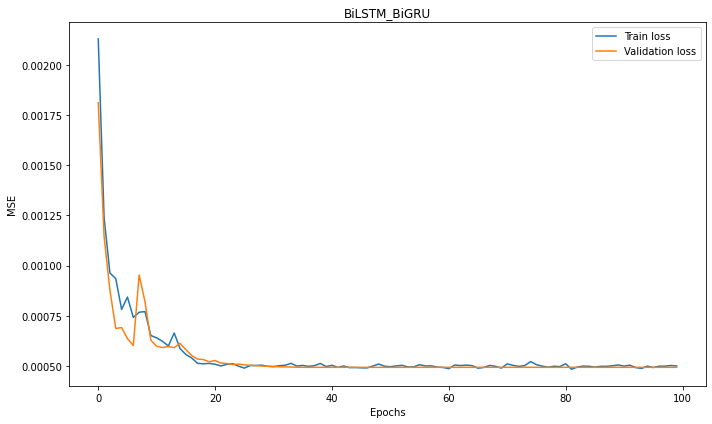

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 4s 10ms/step
RMSE at 40 = 6.866168
RMAE at 40 = 2.3868318
MAPE at 40 = 1.1860577
R2 at 40 = 0.7377472987904108
2/2 [==============================] - 0s 11ms/step
RMSE at 45 = 6.793353
RMAE at 45 = 2.361802
MAPE at 45 = 1.0595995
R2 at 45 = 0.9426223340215893
2/2 [==============================] - 0s 13ms/step
RMSE at 50 = 7.588134
RMAE at 50 = 2.4816296
MAPE at 50 = 0.9659825
R2 at 50 = 0.954286649433539
2/2 [==============================] - 0s 11ms/step
RMSE at 55 = 7.5324407
RMAE at 55 = 2.48
MAPE at 55 = 0.8844805
R2 at 55 = 0.9603951354470147
2/2 [==============================] - 0s 12ms/step
RMSE at 60 = 8.132865
RMAE at 60 = 2.5113132
MAPE at 60 = 0.81685024
R2 at 60 = 0.9572022019805675
3/3 [==============================] - 0s 8ms/step
RMSE at 65 = 8.584328
RMAE at 65 = 2.5656948
MAPE at 65 = 0.7603521
R2 at 65 = 0.9555451601084097
3/3 [==============================] - 0s 8ms/step
RMSE at 70 = 11.254901
RMAE at 70 = 2.7287495
MAPE at 7

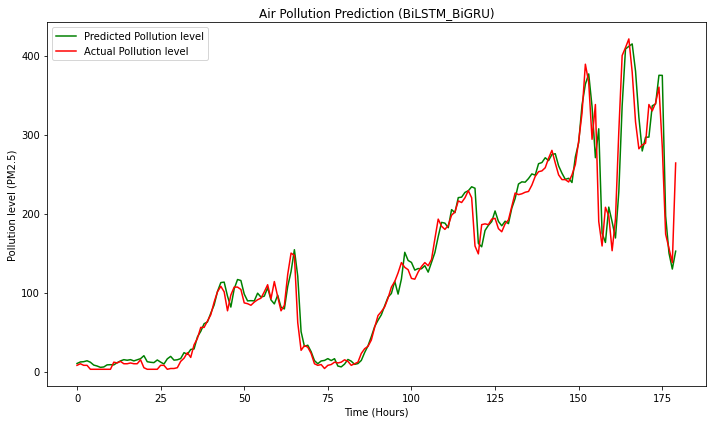

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [ ]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_BiLSTMBiGRU.csv', Y_tested, delimiter=',')